# Additional information:

This notebook was used in the preliminary phase of writing the report to understand the data. It serves to understand how depth and slope correlates to the data points, and how it may affect the spacing of the laser point. No correlation was found, and these results were not included in the report, but it serves as an understanding of the BAS dataset used.

In [3]:
from DELPHI.LPdetection import LPtrain

impath_s = "/Users/Jasthecoolbean/Desktop/soft/images" #Just soft substrate
lppath_s = "/Users/Jasthecoolbean/Desktop/soft/annotations"

impath_h = "/Users/Jasthecoolbean/Desktop/hard/images" #Just soft substrate
lppath_h = "/Users/Jasthecoolbean/Desktop/hard/annotations"

s_trainer = LPtrain(impath = impath_s,lppath = lppath_s)
h_trainer = LPtrain(impath = impath_h,lppath = lppath_h)

ss_dict = s_trainer.image_dict #soft substrate dictionary
hs_dict = h_trainer.image_dict

### MAKE A HARD DICTIONARY TOO, PUT INTO CSV, and then PLOT IT IN OCEAN DATA VIEW! to show where the transects are.


The selected images for this train set are: ['0104', '0225', '0662', '0002', '0602', '0127', '0609', '0044', '0156', '0268', '0336', '0003', '0584', '0480', '0456', '0011', '0790', '0001', '0361', '0420', '0204', '0697', '0190', '0026', '0121', '0358', '0253', '0021', '0172', '0302', '0133', '0154', '0607', '0055', '0857', '0717', '0363', '0128', '0081', '0138', '0078', '0383', '0010', '0112', '0804', '0020', '0591', '0261', '0024', '0232', '0187', '0144', '0531', '0167', '0514', '0052', '0592', '0834', '0196', '0027']
The selected images for this train set are: ['1185', '0148', '0458', '0859', '0700', '1011', '0494', '0734', '1195', '0942', '1106', '1139', '0459', '0555', '1208', '0246', '0266', '1134', '1224', '1124', '0381', '0282', '0738', '0816', '0178', '0315', '0470', '0853', '0188', '0231', '0590', '0310', '0956', '0828', '0926', '0455', '1220', '1023', '0333']


Load the CSV and extract ID-to-depth mapping for depth

In [4]:
import pandas as pd

depth_path = "./ps118_images_long_lat_depths.csv"  # Replace with your actual CSV path
depth_df = pd.read_csv(depth_path)

# Extract 4-digit ID from the filename
depth_df["img_id"] = depth_df["Filename"].str.extract(r"IMG_(\d{4})")
id_to_depth = dict(zip(depth_df["img_id"], depth_df["Depth (m)"]))

Load the CSV and extract ID-to-depth mapping for slope

In [5]:
import pandas as pd

slope_path = "./ps118_images_slope.csv"  # Replace with your actual CSV path
slope_df = pd.read_csv(slope_path)

# Extract 4-digit ID from the filename
slope_df["img_id"] = slope_df["Filename"].str.extract(r"IMG_(\d{4})")
id_to_slope = dict(zip(slope_df["img_id"], slope_df["slope"]))


In [6]:
import numpy as np

depths = []
avg_dists_depths = []

for img_id in ss_dict:
    laser_points = ss_dict[img_id]["laser_points"]
    
    # Sanity check: only consider valid triangles
    if laser_points is None or len(laser_points) != 3:
        continue
    
    # Compute pairwise distances
    a = np.linalg.norm(np.array(laser_points[0]) - np.array(laser_points[1]))
    b = np.linalg.norm(np.array(laser_points[1]) - np.array(laser_points[2]))
    c = np.linalg.norm(np.array(laser_points[2]) - np.array(laser_points[0]))
    
    avg_dist = (a + b + c) / 3

    # Match against the metadata using the last 4 digits of image ID
    if img_id[-4:] in id_to_depth:
        depths.append(id_to_depth[img_id[-4:]])
        avg_dists_depths.append(avg_dist)


In [7]:
slopes = []
avg_dists_slopes = []

for img_id in hs_dict:
    laser_points = hs_dict[img_id]["laser_points"]

    # Sanity check: only consider valid triangles
    if laser_points is None or len(laser_points) != 3:
        continue

    # Compute pairwise distances
    a = np.linalg.norm(np.array(laser_points[0]) - np.array(laser_points[1]))
    b = np.linalg.norm(np.array(laser_points[1]) - np.array(laser_points[2]))
    c = np.linalg.norm(np.array(laser_points[2]) - np.array(laser_points[0]))

    avg_dist = (a + b + c) / 3

    if img_id[-4:] in id_to_slope:
        slopes.append(id_to_slope[img_id[-4:]])
        avg_dists_slopes.append(avg_dist)

Text(0.5, 1.0, 'slope and laser point spacing')

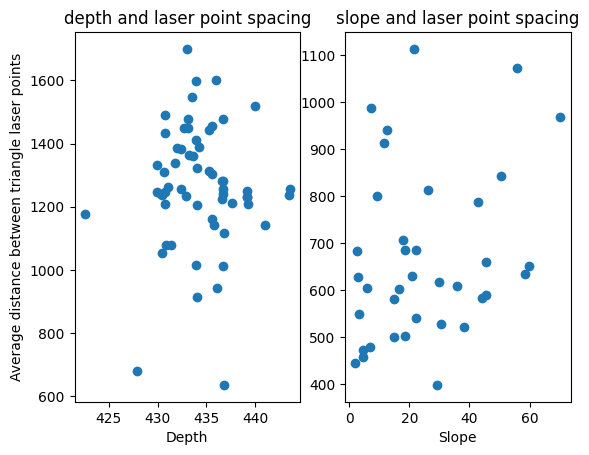

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].scatter(depths, avg_dists_depths)
ax[0].set_xlabel("Depth")
ax[0].set_ylabel("Average distance between triangle laser points")
ax[0].set_title("depth and laser point spacing")
ax[1].scatter(slopes, avg_dists_slopes)
ax[1].set_xlabel("Slope")
ax[1].set_title("slope and laser point spacing")

Text(0.5, 1.0, 'histogram of slopes')

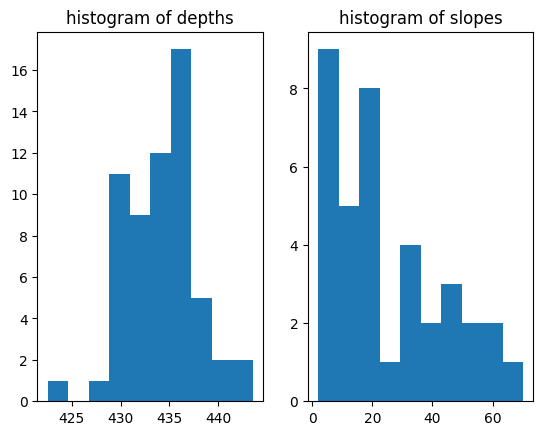

In [9]:
fig, ax = plt.subplots(1,2)
ax[0].hist(depths)
ax[0].set_title("histogram of depths")
ax[1].hist(slopes)
ax[1].set_title("histogram of slopes")